In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='SimHei', size=13)
plt.style.use('classic')
%matplotlib inline

## 1 | `plt.axes`手动创建子图

`plt.axes[bottom, left, width, height]` 数据取值范围是左下角为0, 右上角为1

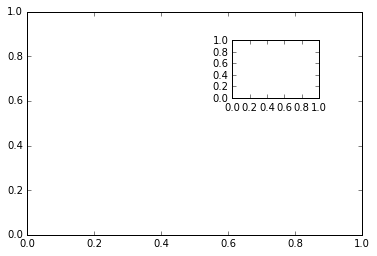

In [6]:
ax1 = plt.axes()
ax2 = plt.axes([0.6, 0.6, 0.2, 0.2])

## 2 | `plt.subplot`简易网格子图

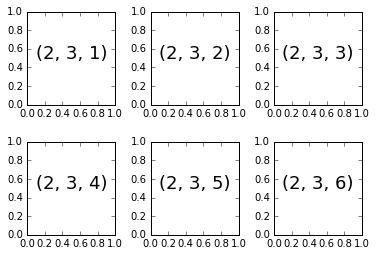

In [17]:
fig = plt.figure()
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)  # 调整间隔
for i in range(1, 7):
    ax = fig.add_subplot(2,3,i) # plt.subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize = 18, ha = 'center') # plt.text(0.5, 0.5, str((2, 3, i)), fontsize = 18, ha = 'center')

## 3 | `plt.subplots`一行代码创建网格

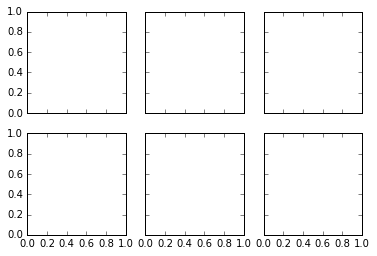

In [20]:
fig, ax = plt.subplots(2, 3, sharex= 'col', sharey = 'row')  # 创建2x3的网格, sharey:每行3个子图使用相同y坐标, sharex: 每列两个子图使用相同x坐标

通过`sharey`和`sharex`让图形看起来更整洁

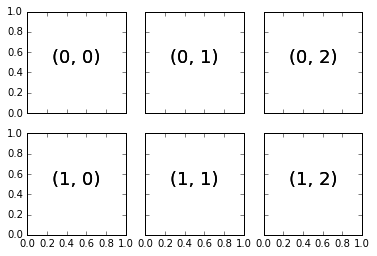

In [23]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize = 18, ha = 'center')
fig

## 4 | `plt.GridSpec`实现更复杂的排列方式

通过`plt.GridSpec`加上切片的语法可以设置子图的位置和扩展尺寸

In [24]:
grid = plt.GridSpec(2, 3, wspace = 0.4, hspace = 0.3)  # 2x3网格

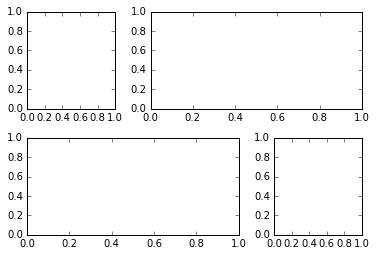

In [25]:
plt.subplot(grid[0, 0])  # 占[0,0]
plt.subplot(grid[0, 1:]) # 占[0, 1]和[0, 2]
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

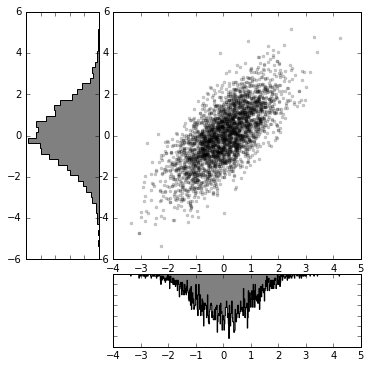

In [26]:
mean = [0, 0]; cov = [[1, 1], [1, 2]];
x, y = np.random.multivariate_normal(mean, cov, 3000).T

fig = plt.figure(figsize = (6, 6))
grid = plt.GridSpec(4, 4, hspace = 0.2, wspace = 0.2)
main_ax = fig.add_subplot(grid[:-1,1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels = [], sharey = main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels = [], sharex = main_ax)

# 主坐标轴画散点图
main_ax.plot(x, y, 'ok', markersize = 3, alpha = 0.2)

# 次坐标轴画频次直方图
x_hist.hist(x, 430, histtype = 'stepfilled', orientation = 'vertical', color = 'gray')
x_hist.invert_yaxis()  # 贴着主图一侧

y_hist.hist(y, 40, histtype = 'stepfilled', orientation = 'horizontal', color = 'gray')
y_hist.invert_xaxis()